# Overlord AI
For information about this project, see [this README.md](README.md)


# CODE STARTS HERE

First we import all the libraries and whatnot

# imports
import pandas as pd
import glob


Definitions go here

# definitions
dataPath = '../data/*.csv'
dfList = []  # define a list for the dataFields


Read the data, using glob to get all the files at once

# reading data
dataList = glob.glob(dataPath)
print(dataList)
for fileName in dataList:
    dfList.append(pd.read_csv(fileName, index_col=0))
    print(len(dfList))
    print(fileName)


Method to show some info about the data

# data summary define
def showDataSummary(x):
    print('data type:') 
    print(type(df)) 
    print('10 samples:')
    print(x.sample(10)) # needs to be encapsulated in print()
    print('data describe:')
    print(x.describe()) # needs to be encapsulated in print()
    print('data info:')
    print(x.info())

Loop to run through all the dataframes in dfList

# loop through dflist
for df in dfList:
   showDataSummary(df)
   print('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA')
   #print(df)

In [188]:
import pandas as pd
import numpy as np
import pylab as pyl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import glob

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

numpy version: 1.23.3
matplotlib version: 1.5.0


## load dataset

In [189]:
dataPath = '../data/ds_salaries.csv'
df = pd.read_csv(glob.glob(dataPath)[0],index_col=0)
df.head(10)



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [190]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
179,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
95,2021,MI,FT,Cloud Data Engineer,120000,SGD,89294,SG,50,SG,L
541,2022,SE,FT,Data Analyst,81666,USD,81666,US,100,US,M
359,2022,SE,FT,Data Architect,90700,USD,90700,CA,100,CA,M
104,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
31,2020,EN,FT,Big Data Engineer,70000,USD,70000,US,100,US,L
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
378,2022,SE,FT,Data Architect,208775,USD,208775,US,100,US,M
283,2021,SE,CT,Staff Data Scientist,105000,USD,105000,US,100,US,M
411,2022,MI,FT,Data Scientist,35000,GBP,45807,GB,0,GB,M


## investigate dataset

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [192]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


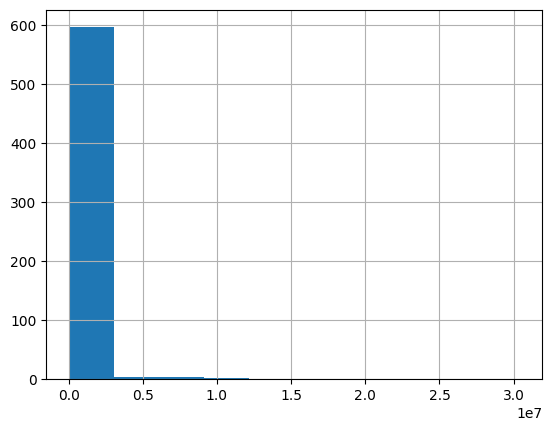

In [193]:
df['salary'].hist()
pyl.show()

<AxesSubplot: title={'center': 'salary_in_usd'}, xlabel='experience_level'>

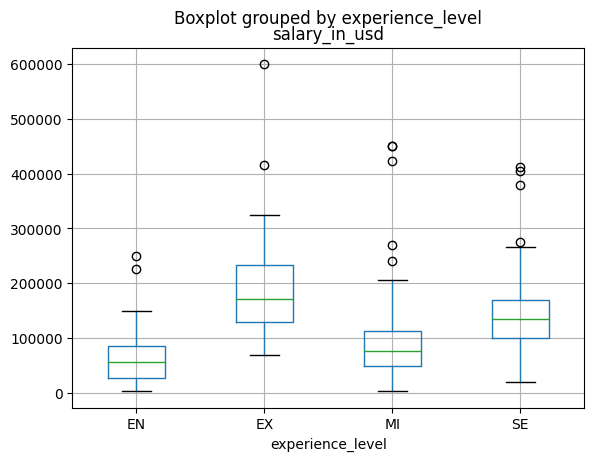

In [205]:
df.boxplot(column="salary_in_usd", by="experience_level")


## transform data

In [195]:
df['company_sizeN'] = df['company_size'].map({'S': 0, 'M': 1, 'L': 2}).astype(int)
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_sizeN
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,2
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,0
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1


In [196]:
df['experience_levelN'] = df['experience_level'].map(
    {'MI': 0, 'SE': 1, 'EN': 2, 'EX': 3}).astype(int)
df.sample(3)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_sizeN,experience_levelN
425,2022,MI,FT,Data Engineer,82900,USD,82900,US,0,US,M,1,0
323,2022,SE,FT,Data Scientist,180000,USD,180000,US,0,US,L,2,1
517,2022,MI,FT,Data Engineer,62000,EUR,68147,FR,100,FR,M,1,0


## deal with missing values

In [197]:
# n/a

## preprocessing


In [198]:
df_X = df[['experience_levelN', 'company_sizeN', 'salary']]
df_y = df['salary_in_usd']
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_sizeN,experience_levelN
233,2021,SE,FT,Data Analyst,200000,USD,200000,US,100,US,L,2,1
41,2020,EX,FT,Data Engineering Manager,70000,EUR,79833,ES,50,ES,L,2,3
508,2022,EN,FT,Research Scientist,120000,USD,120000,US,100,US,L,2,2
218,2021,MI,FT,Machine Learning Engineer,75000,EUR,88654,BE,100,BE,M,1,0
128,2021,EN,FT,Machine Learning Engineer,20000,USD,20000,IN,100,IN,S,0,2
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S,0,1
295,2022,MI,FT,Data Engineer,150000,USD,150000,US,100,US,M,1,0
486,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M,1,1
412,2022,MI,FT,Data Engineer,60000,EUR,65949,GR,100,GR,M,1,0
408,2022,MI,FT,Data Analyst,40000,GBP,52351,GB,100,GB,M,1,0


In [199]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(df_X, df_y, test_size=0.2, random_state=1337)


## training decision tree classifier

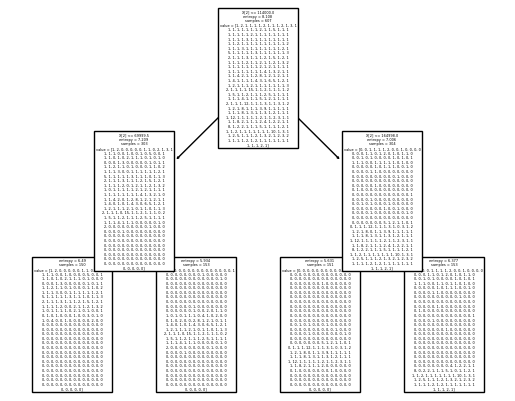

In [200]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state=1337)
tree_clf.fit(df_X,df_y)

tree.plot_tree(tree_clf);

## evaluation metrics

In [206]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test_df)
accuracy_score(y_test_df, y_pred)

0.09016393442622951

that's low af
